## UNSUPERVISED LEARNING IN R

> USING K MEANS CLUSTERING IN THE IRIS DATASET

> Basic Introduction to R

In [3]:
#Loading the iris dataset

data("iris")

In [4]:
#Viewing the structure of the dataset

str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [6]:
#Viewing the statistical summary of the dataset

summary(iris) 

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [7]:
#Prieviewing the dataset

head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


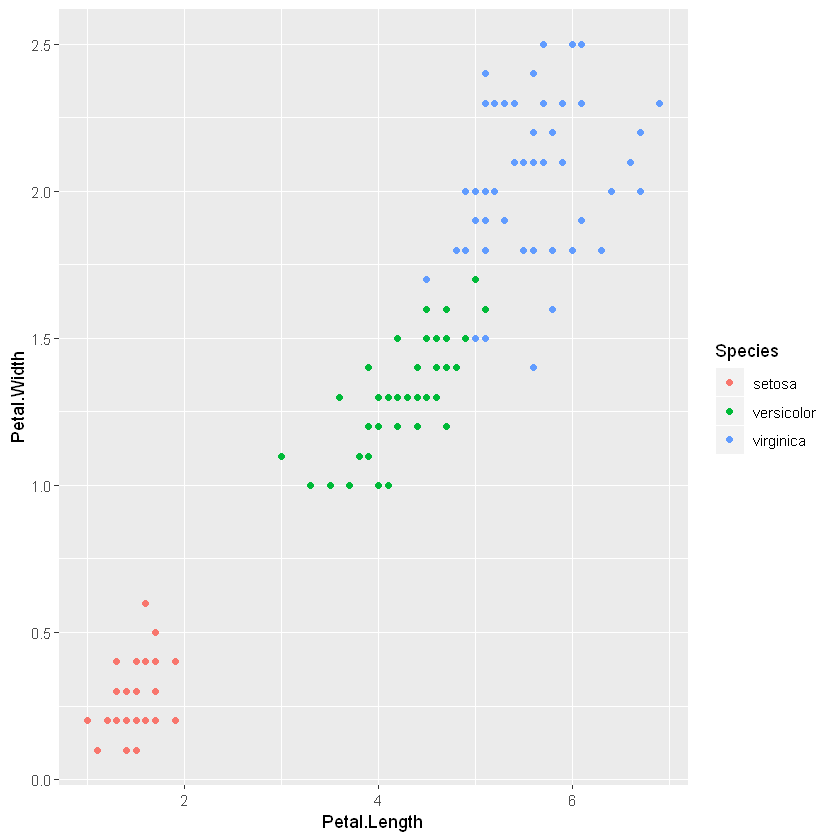

In [21]:
#Visualizing the Species column

library(ggplot2)
ggplot(iris, aes(Petal.Length, Petal.Width, color = Species)) + geom_point()


In [8]:
#Preprocessing the dataset
# Since clustering is a type of Unsupervised Learning, 
# we would not require Class Label(output) during execution of our algorithm. 
# We will, therefore, remove Class Attribute “Species” and store it in another variable. 
# We would then normalize the attributes between 0 and 1 using our own function.

iris.new = iris[,c(1,2,3,4)]
iris.class= iris[,'Species']
head()

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


In [9]:
#Previewing the last column

head(iris.class)

[1] setosa setosa setosa setosa setosa setosa
Levels: setosa versicolor virginica

> CLUSTERING

In [22]:
#Set seed to ensure reproductivity

set.seed(20)
irisCluster = kmeans(iris[,3:4], 3, nstart=20)
irisCluster

K-means clustering with 3 clusters of sizes 52, 48, 50

Cluster means:
  Petal.Length Petal.Width
1     4.269231    1.342308
2     5.595833    2.037500
3     1.462000    0.246000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
[112] 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
[149] 2 2

Within cluster sum of squares by cluster:
[1] 13.05769 16.29167  2.02200
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [23]:
#Since we know that there are 3 species involved,
#we ask the algorithm to group the data into 3 clusters,
#and since the starting assignments are random, 
#we specify nstart = 20.
#This means that R will try 20 different random starting assignments 
#and then select the one with the lowest within cluster variation.

#Let's compare the clusters with the species

table(irisCluster$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0         48         4
  2      0          2        46
  3     50          0         0

The data belonging to the setosa species got grouped into cluster 3, versicolor into cluster 2, and virginica into cluster 1. The algorithm wrongly classified two data points belonging to versicolor and six data points belonging to virginica.

# METHOD 2

In [27]:
#Importing the dataset

require('datasets')

In [28]:
#Loading the iris dataset

data("iris")

In [29]:
#Viewing the structure of the dataset

str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [30]:
#Viewing the statistical summary of the dataset

summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [31]:
#Previewing the dataset

head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [33]:
#Drop the species column

iris.new= iris[, c(1,2,3,4)]
iris.class= iris[,'Species']
head(iris.new)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


> K- Means Clustering

Partitioning n observations into a fixed number of k clusters. The algorithm will find homogeneous clusters.


In [34]:
# centers is the predefined number of clusters
#nstart times to improve the returned model

stats::kmeans(iris.new, centers = 3, nstart = 10)

K-means clustering with 3 clusters of sizes 62, 50, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.901613    2.748387     4.393548    1.433871
2     5.006000    3.428000     1.462000    0.246000
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

Within cluster sum of squares by cluster:
[1] 39.82097 15.15100 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

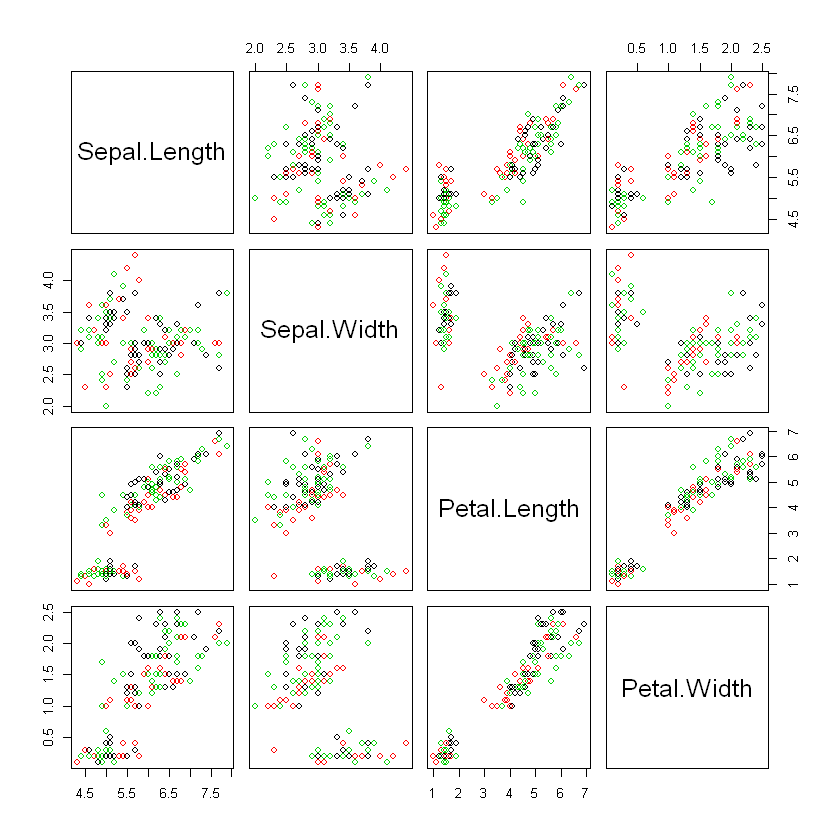

In [36]:
#Initialisation : Randomly assign the class membership

set.seed(12)
init= sample(3, nrow(iris.new), replace = TRUE)
plot(iris.new, col= init)

Calculate the centre of each subgroup as the average position of all observations is that subgroup.

Each observation is then assigned to the group of its nearest centre.


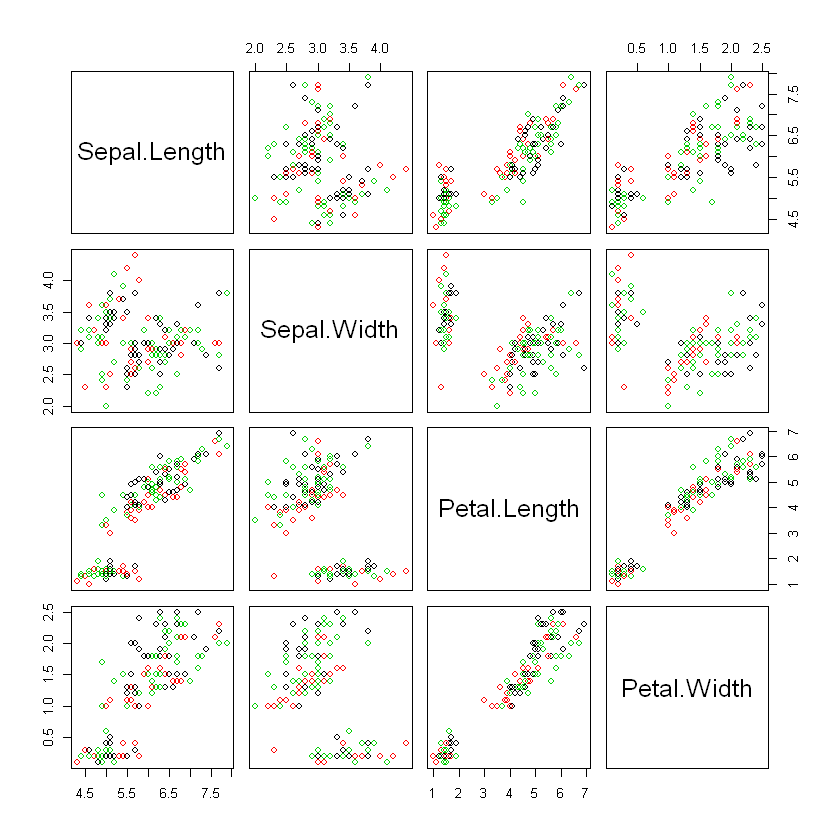

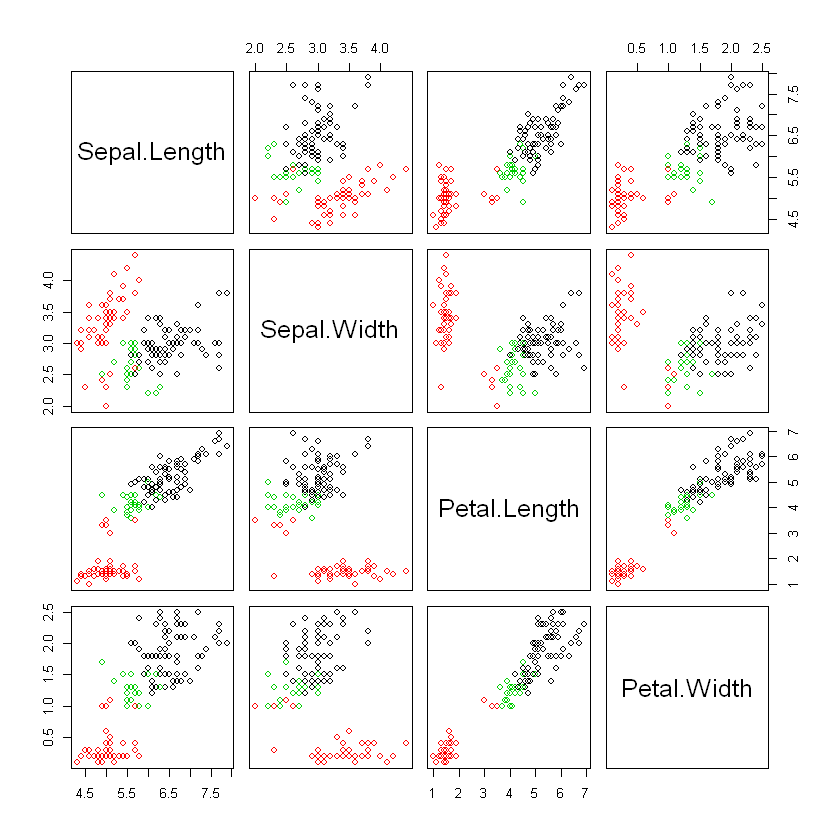

In [40]:
par(mfrow = c(1, 2))
plot(iris.new, col = init)
centers = sapply(1:3, function(i) colMeans(iris.new[init==i,],))
                 centers= t(centers)
                 points(centers[,1],centers[,2], pch=19, col=1:3)
                 
tmp = dist(rbind(centers, iris.new))
                 tmp= as.matrix(tmp)[, 1: 3]
                 
ki = apply(tmp, 1, which.min)
                 ki = ki[-(1:3)]
                 
plot(iris.new, col = ki)
points(centers[,1], centers[,2], pch= 19, col=1:3)                 
                
                 

> PCA

In [45]:
#Let's reduce dimensionality

irispca = prcomp(iris.new[, -5])
summary(irispca)

Importance of components:
                          PC1     PC2    PC3     PC4
Standard deviation     2.0563 0.49262 0.2797 0.15439
Proportion of Variance 0.9246 0.05307 0.0171 0.00521
Cumulative Proportion  0.9246 0.97769 0.9948 1.00000

A biplot features all original points re-mapped (rotated) along the first two PCs as well as the original features as vectors along the same 
Feature vectors that are in the same direction in PC space are also correlated in the original data space.

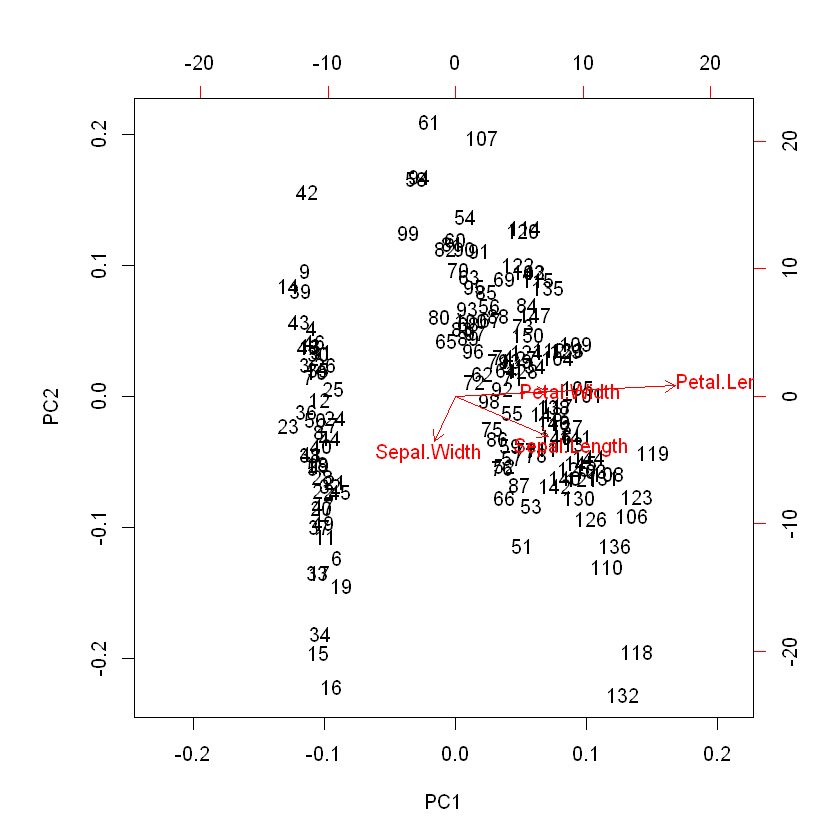

In [46]:
#Visualizing the pca using biplot

biplot(irispca)

Extract the standard deviations from the PCA result to calculate the variances, 
then obtain the percentage of and cumulative variance along the PCs.

In [47]:
var = irispca$sdev^2
(pve = var/sum(var))

[1] 0.924618723 0.053066483 0.017102610 0.005212184

In [48]:
cumsum(pve)

[1] 0.9246187 0.9776852 0.9947878 1.0000000

>  t-Distributed Stochastic Neighbour Embedding

In [57]:
install.packages('Rtsne')

Warning message:
"package 'Rtsne' is in use and will not be installed"

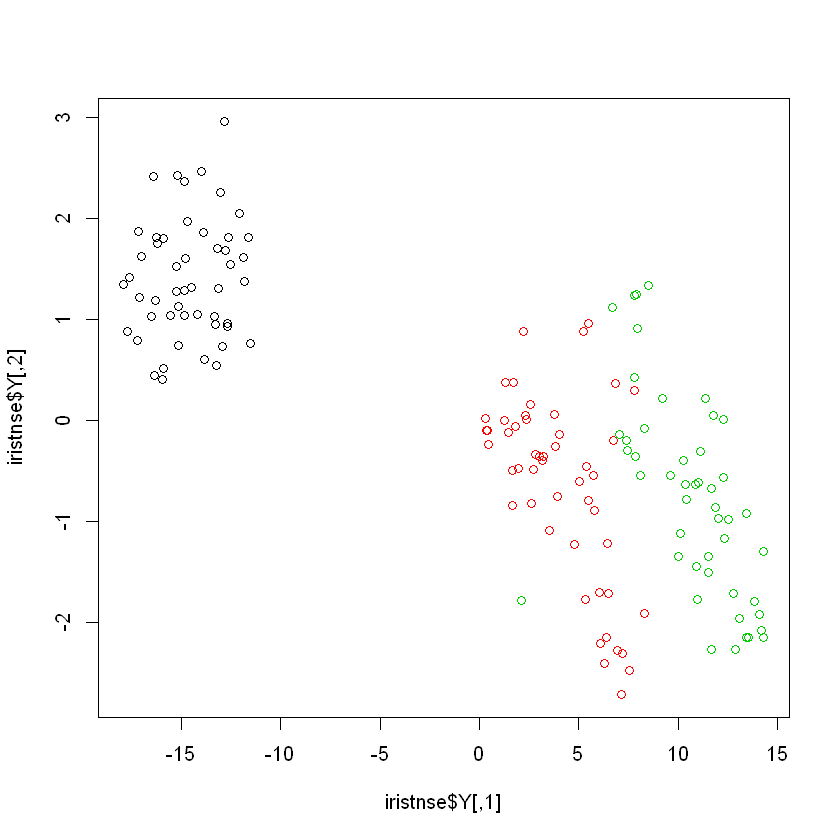

In [61]:
# Using the Rtnse function
# Removing any duplicated entrie in the dataset

library("Rtsne")
uiris = unique(iris[, 1:5])
iristnse = Rtsne(uiris[, 1:4])
plot(iristnse$Y, col= uiris$Species)
